
# Sect 14 - Hypothesis Testing - T-Tests

- online-ds-ft-070620
- 08/11/20



# Questions

# Topics / Learning Objectives

- Briefly Review: Normal distribution / Z-tests 
- Discuss Central Limit Theorem & Sampling
- The T-Distribution (and degrees of Freedom)
- Intro to AB Testing / Big-Picture Hypothesis Testing Workflow

# Resources

- **My Complete Outline / Resource Repo for Hypothesis Testing**
    - URL: https://github.com/jirvingphd/hypothesis_testing_workflow_python
    - Includes:
        - Practice Hypothesis Testing Project
        - [Hypothesis Testing Slide Show (Code Academy)](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)
        - [Notebook with Full Hypothesis Testing Outline](https://nbviewer.jupyter.org/github/jirvingphd/hypothesis_testing_workflow_python/blob/master/hypothesis_testing_workflow.ipynb)
    
    
- [Hypothesis Testing Cheat Sheet](https://drive.google.com/file/d/17ePxNQdfM3OdrKEr_v0rVmivv9mNI_6I/view?usp=sharing)


# Section 14: Hypothesis Testing

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

## P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 
> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  




In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  


> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 




***When in doubt, do a 2-tailed test***

In [1]:
!pip install -U fsds
from fsds.imports import *

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


[i] Pandas .iplot() method activated.


In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

## The T-Distribution & T-Tests

- To adjust for small sample sizes, statisticians created the T-Distribution for hypothesis testing in lieu of the normal distribution.

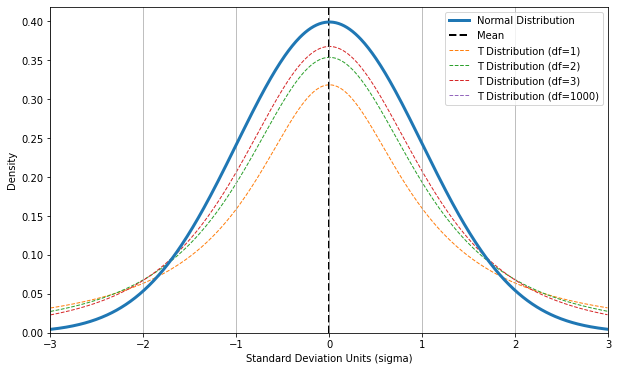

In [3]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


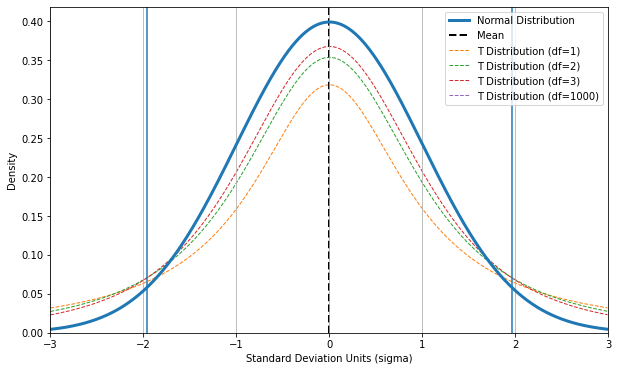

In [4]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


# Hypothesis Testing Overview 

- Complete Hypothesis Testing Workflow Repo + Practice Project:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

Two resource from repo included in this repo.
- Open `hypothesis_testing_workflow-v2_WIP.ipynb`
- Open `Hypothesis Testing with SciPy_codeacademy slides.pdf`

## Hypothesis Testing (summary)

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Hypothesis Testing Applied with Northwind Database

<img src ="../../datasets/Northwind_ERD_updated.png" width=80%>

### Hypothesis 1

> Do discounted items sell sell in greater/lesser quantities than full price products?

- $H_0$:
- $H_A$: 

## STEP 1: Determine the category/type of test based on your data.

###  What kind of test?
#### Using the answers to the above 2 questions: select the type of test from this table.

| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|

## STEP 2:  Do we meet the assumptions of the chosen test?

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("../../datasets/Northwind_small.sqlite")
cur = conn.cursor()

In [2]:
df = pd.DataFrame(cur.execute('select * from OrderDetail').fetchall(),
                  columns=[col[0] for col in cur.description])
df

Id  OrderId  ProductId  UnitPrice  Quantity  Discount
0     10248/11    10248         11      14.00        12      0.00
1     10248/42    10248         42       9.80        10      0.00
2     10248/72    10248         72      34.80         5      0.00
3     10249/14    10249         14      18.60         9      0.00
4     10249/51    10249         51      42.40        40      0.00
...        ...      ...        ...        ...       ...       ...
2150  11077/64    11077         64      33.25         2      0.03
2151  11077/66    11077         66      17.00         1      0.00
2152  11077/73    11077         73      15.00         2      0.01
2153  11077/75    11077         75       7.75         4      0.00
2154  11077/77    11077         77      13.00         2      0.00

[2155 rows x 6 columns]

In [6]:
df['discounted'] = df['Discount'].apply(lambda x: 'Discounted' if x >0 else "Full Price")
df

Id  OrderId  ProductId  UnitPrice  Quantity  Discount  discounted
0     10248/11    10248         11      14.00        12      0.00  Full Price
1     10248/42    10248         42       9.80        10      0.00  Full Price
2     10248/72    10248         72      34.80         5      0.00  Full Price
3     10249/14    10249         14      18.60         9      0.00  Full Price
4     10249/51    10249         51      42.40        40      0.00  Full Price
...        ...      ...        ...        ...       ...       ...         ...
2150  11077/64    11077         64      33.25         2      0.03  Discounted
2151  11077/66    11077         66      17.00         1      0.00  Full Price
2152  11077/73    11077         73      15.00         2      0.01  Discounted
2153  11077/75    11077         75       7.75         4      0.00  Full Price
2154  11077/77    11077         77      13.00         2      0.00  Full Price

[2155 rows x 7 columns]

In [7]:
df.describe()

OrderId    ProductId    UnitPrice     Quantity     Discount
count   2155.000000  2155.000000  2155.000000  2155.000000  2155.000000
mean   10659.375870    40.793039    26.218520    23.812993     0.056167
std      241.378032    22.159019    29.827418    19.022047     0.083450
min    10248.000000     1.000000     2.000000     1.000000     0.000000
25%    10451.000000    22.000000    12.000000    10.000000     0.000000
50%    10657.000000    41.000000    18.400000    20.000000     0.000000
75%    10862.500000    60.000000    32.000000    30.000000     0.100000
max    11077.000000    77.000000   263.500000   130.000000     0.250000

In [8]:
df.groupby('discounted')['Quantity'].describe()

count       mean        std  min   25%   50%   75%    max
discounted                                                            
Discounted   838.0  27.109785  20.771439  1.0  12.0  20.0  36.0  130.0
Full Price  1317.0  21.715262  17.507493  1.0  10.0  18.0  30.0  130.0

In [9]:
groups = df['discounted'].unique()
groups

array(['Full Price', 'Discounted'], dtype=object)

In [34]:
## Separate group data into separate vars/keys
data = {}
for grp in groups:
    
    group_df = df.groupby('discounted').get_group(grp)['Quantity']#.values
    data[grp] = group_df
    
data

{'Full Price': 0       12
 1       10
 2        5
 3        9
 4       40
         ..
 2147     2
 2148     2
 2151     1
 2153     4
 2154     2
 Name: Quantity, Length: 1317, dtype: int64,
 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
         ..
 2144     2
 2146     3
 2149     2
 2150     2
 2152     2
 Name: Quantity, Length: 838, dtype: int64}

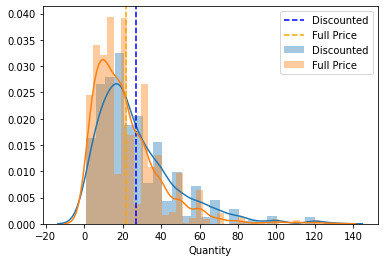

In [35]:
ax = sns.distplot(data['Discounted'],label='Discounted')
ax.axvline(data['Discounted'].mean(),color='blue',ls='--',label='Discounted')

sns.distplot(data['Full Price'],label='Full Price')
ax.axvline(data['Full Price'].mean(),color='orange',ls='--',label='Full Price')

ax.legend()

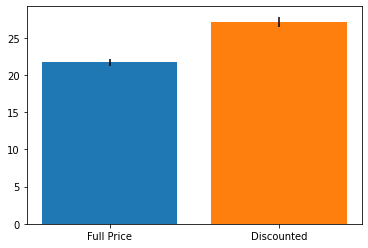

In [37]:
for grp,grp_data in data.items():
    plt.bar(grp,grp_data.mean(),yerr=stats.sem(grp_data))

<AxesSubplot:xlabel='discounted', ylabel='Quantity'>

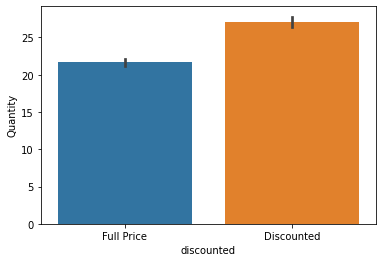

In [38]:
sns.barplot(data=df,x='discounted',y='Quantity',ci=68)

In [32]:
z_data= stats.zscore(data['Discounted'])
idx_outlier = np.abs(z_data)>3
idx_outlier.sum()

12

In [33]:
data['Discounted'][~idx_outlier]

6       35
7       15
8        6
9       15
11      40
        ..
2144     2
2146     3
2149     2
2150     2
2152     2
Name: Quantity, Length: 811, dtype: int64

# BOOKMARK

In [15]:
idx_outlier.sum()

15

In [16]:
for grp, grp_data in data.items():
    z_data= stats.zscore(grp_data)
    idx_outlier = np.abs(z_data)>3
    print(f"There were {idx_outlier.sum()} outliers in {grp}")
    data[grp]= grp_data[~idx_outlier]

There were 20 outliers in Full Price
There were 15 outliers in Discounted


<AxesSubplot:>

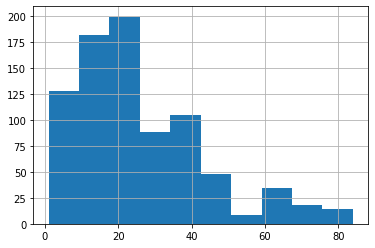

In [17]:
data['Discounted'].hist()

For Full Price, normaltest p = 0.0
For Discounted, normaltest p = 0.0


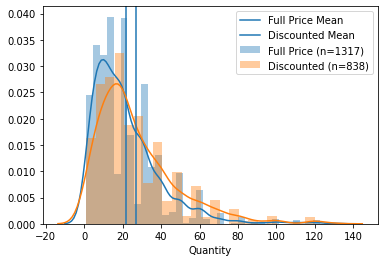

In [41]:
for grp, grp_data in data.items():
    stat,p =stats.normaltest(grp_data)# test_for_normality(grp_data,label=grp,get_p=True)
    print(f"For {grp}, normaltest p = {round(p,4)}")
    ax = sns.distplot(grp_data, label= f"{grp} (n={len(grp_data)})")
    ax.axvline(grp_data.mean(),label=f'{grp} Mean')
ax.legend()

In [42]:
res = [*list(data.values())]
res

[0       12
 1       10
 2        5
 3        9
 4       40
         ..
 2147     2
 2148     2
 2151     1
 2153     4
 2154     2
 Name: Quantity, Length: 1317, dtype: int64,
 6       35
 7       15
 8        6
 9       15
 11      40
         ..
 2144     2
 2146     3
 2149     2
 2150     2
 2152     2
 Name: Quantity, Length: 838, dtype: int64]

In [43]:
stats.levene(*list(data.values()))

LeveneResult(statistic=14.832671704073421, pvalue=0.00012091378376079568)

In [44]:
stats.ttest_ind(*list(data.values()),equal_var=False)

Ttest_indResult(statistic=-6.239069142123973, pvalue=5.65641429030433e-10)

# Next Class: Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

In [ ]:
from fsds.imports import *

In [ ]:
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

## Obtaining/Preprocessing Data

In [ ]:
import os
print(os.getcwd())
# os.listdir('../../datasets/')

In [ ]:
df = pd.read_csv('../../datasets/mouse_drinking_data_cleaned.csv',#"../../datasets/mouse_drinking_data_cleaned.csv")#,
                 index_col=0)
df.drop('Sex',inplace=True,axis=1)
df 

#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [ ]:
## Loop through the differnet phases of the experiment
phases = ['BL','S','PS','R1','R2']

## save corresponding column names as values 
col_dict = {}
for phase in phases:
    col_dict[phase] = [col for col in df.columns if col.startswith(phase) ]
col_dict    

In [ ]:
## Get then opposite of col_dict
phase_dict = {}
for phase,colnames in col_dict.items():
    for col in colnames:
        phase_dict[col] = phase
phase_dict

### Calculating individual mouse means by phase

In [ ]:
cols = col_dict['BL']
df[cols].mean(axis=1)

In [ ]:
df_means = df.reset_index()[['Mouse_ID','Group']].copy()
df_means

In [ ]:
## Calculated the means by phase
df_means = df.reset_index(drop=False)[['Mouse_ID','Group']].copy()

for phase, cols in col_dict.items():
    df_means[phase] = df[cols].mean(axis=1)
df_means

In [ ]:
df

### Getting Group Data For EDA & Testing

In [ ]:
## Get grps 
data = {}

## Two different ways of using groupby
grps = df_means.groupby('Group').groups

## For each group
for grp in grps:
    
    ## Save the group df as grp name 
    data[grp] = df_means.groupby('Group').get_group(grp)
    
    # Display data
    display(data[grp].head().style.set_caption(grp))

In [ ]:
data.keys()

In [ ]:
data['Control']

### Plotting Group Means + Standard Error of the Mean

In [ ]:
from scipy.stats import sem

## Create lists for saving x,y, and yerr
x = []
y = []
y_err = []

## Select a phase to visualize
phase = "BL"

# For each group
for group in data:
    
    ## grab the correct phasen col from group data
    grp_data = data[group][phase]
    
    ## Save x,y 
    x.append(group)
    y.append(grp_data.mean())
    
    ## Calc and save error
    y_err.append(sem(grp_data))
    

In [ ]:
y_err

In [ ]:
fig,ax = plt.subplots(figsize=(2,4))
plt.bar(x,y,yerr=y_err,color=['b','g'])


In [ ]:
def plot_bars_yerr(data,phase = "BL"):
    """Plots the group means +/- standard error of the mean."""
    from scipy.stats import sem

    ## Save x,y, and yerr
    x = []
    y = []
    y_err = []
    
    for group in data:
        grp_data = data[group][phase]
        x.append(f"{group}")
        y.append(grp_data.mean())
        y_err.append(sem(grp_data))
        
    fig,ax = plt.subplots(figsize=(3,5))
    ax.bar(x,y,yerr=y_err,color=['k','b'])
    ax.set_title(f"Phase = {phase}")
    ax.set(ylabel='# of Licks')
    
    return fig,ax

### Run 2-sample T-Test on Baseline Days

In [ ]:
f,a = plot_bars_yerr(data,phase = "BL")

In [ ]:
test_phase = "BL"
f,a = plot_bars_yerr(data,phase)

In [ ]:
for grp in data:
    pass

for grp,grp_df in data.items():
    print(grp)
#     display(grp_df)
grp_df

In [ ]:
import scipy.stats as st
test_phase = 'BL'
## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])
results

In [ ]:
pd.DataFrame(results[1:],columns=results[0])

### Adding Levene's Test

In [ ]:
import scipy.stats as st

## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])


## Test for equal variance
stat, p = st.levene(*test_equal_var)
results.append(['Equal Variance','all',stat,p,p<.05])
    
results_df = pd.DataFrame(results[1:],columns=results[0])
results_df

### Run Correct Test

In [ ]:
st.mannwhitneyu(*test_equal_var)

In [ ]:
## Functionize code for testing other phases
import scipy.stats as st
def test_assumptions(data,test_phase):#,plot=True):

    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

In [ ]:
res_df=  test_assumptions(data,'S')
res_df

In [ ]:
fig,ax = plot_bars_yerr(data,phase='S')

In [ ]:
## Add Plotting to function
import scipy.stats as st
def test_assumptions(data,test_phase,plot=True):

    if plot:
        fig,ax = plot_bars_yerr(data,phase=test_phase)
        
    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

In [ ]:
RESULTS = {}
for phase in phases:
    res_df = test_assumptions(data,phase)
    
    display(res_df)
    plt.show()
    

In [ ]:
df_means